# **Used Car Price Prediction for Pakistani Market** 

## Data Science Methodology

                           
                           
We will follow **John Rollin** Data Science Methodolog. Thier methodology steps are following:
                           
- Business Understanding
- Analytics Aproach
- Data Requirements
- Data Collection
- Data Understanding
- Data Preparation
- Modelling
- Evalutaiton
- Deployment
- Feedback

We will go through each step one by one.


## 1. Business Understanding

### Methodology
This project follows the John Rollins Data Science Methodology.

### Problem
The used car market lacks price transparency, making fair pricing difficult for buyers and sellers.

### Objective
Predict the fair market price of a used car using historical listing data.

### Business Question
What should be the estimated price of a used car given its features?

### Constraints
- Public web data only
- No paid datasets or APIs



## 2. Data Requirements

### Target Variable
- Price (PKR)

### Key Features
- Brand
- Model
- Year
- Mileage
- Engine capacity
- Transmission
- Fuel type
- City

### Data Format
- Raw data stored as CSV
- Cleaned data stored separately



## 3. Data Collection

### Source
Used car listings from PakWheels.

### Method
Automated web data extraction due to IP blocking during manual scraping.

### Output
Raw dataset saved in `data/raw/`.


In [1]:
# Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Utilities
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = [10,5]


In [2]:
df = pd.read_csv("dataset_pakwheels_used_cars.csv")

## 4. Data Understanding

### Objective
Understand the structure and quality of the raw dataset before preprocessing.

### Data Source
Used car listings collected from PakWheels using an automated data extraction service.

### Initial Inspection
- Dataset size and structure
- Column names and data types
- Missing values and inconsistencies

### Data Quality Notes
- Raw data contains noise and mixed formats
- Missing values and duplicates may exist
- Cleaning will be done in the next step

In [3]:
# Shape of Dataset
df.shape

(1287, 23)

In [4]:
# First few rows of dataset
df.head()

,body_type,city,color,description,detail_url,engine_cc,from_detail,fuel,id,image,...,price,price_currency,price_note,scraped_at,source,thumbnail,title,transmission,url_list_page,year
0,Sedan,Karachi,Black,Mercedes Benz E Class 2011 for sale in Karachi,https://www.pakwheels.com/used-cars/mercedes-b...,2100.0,True,Petrol,10900078,https://cache1.pakwheels.com/ad_pictures/1349/...,...,9850000,PKR,converted_from_lacs,2025-12-26T14:07:16.617Z,pakwheels,https://cache4.pakwheels.com/ad_pictures/1342/...,Mercedes Benz E Class 2011 for sale in Karachi,Automatic,https://www.pakwheels.com/used-cars/search/-/,2011
1,Crossover,Yazman mandi,White,Toyota Raize 2020 for sale in Yazman mandi,https://www.pakwheels.com/used-cars/toyota-rai...,1000.0,True,Petrol,10973988,https://cache1.pakwheels.com/ad_pictures/1344/...,...,6190000,PKR,converted_from_lacs,2025-12-26T14:07:16.282Z,pakwheels,https://cache3.pakwheels.com/ad_pictures/1354/...,Toyota Raize 2020 for sale in Yazman mandi,Automatic,https://www.pakwheels.com/used-cars/search/-/,2020
2,Hatchback,Lahore,Black,Toyota Aqua 2013 for sale in Lahore,https://www.pakwheels.com/used-cars/toyota-aqu...,1500.0,True,Hybrid,10940925,https://cache2.pakwheels.com/ad_pictures/1354/...,...,3290000,PKR,converted_from_lacs,2025-12-26T14:07:16.250Z,pakwheels,https://cache3.pakwheels.com/ad_pictures/1349/...,Toyota Aqua 2013 for sale in Lahore,Automatic,https://www.pakwheels.com/used-cars/search/-/,2013
3,Sedan,Lahore,Grey,Hyundai Elantra 2023 for sale in Lahore,https://www.pakwheels.com/used-cars/hyundai-el...,2000.0,True,Petrol,10880547,https://cache1.pakwheels.com/ad_pictures/1354/...,...,7500000,PKR,converted_from_lacs,2025-12-26T14:07:16.464Z,pakwheels,https://cache4.pakwheels.com/ad_pictures/1339/...,Hyundai Elantra 2023 for sale in Lahore,Automatic,https://www.pakwheels.com/used-cars/search/-/,2023
4,Hatchback,Karachi,Burgundy,Toyota Aqua 2020 for sale in Karachi,https://www.pakwheels.com/used-cars/toyota-aqu...,1500.0,True,Hybrid,10947072,https://cache4.pakwheels.com/ad_pictures/1352/...,...,5100000,PKR,converted_from_lacs,2025-12-26T14:07:16.649Z,pakwheels,https://cache2.pakwheels.com/ad_pictures/1354/...,Toyota Aqua 2020 for sale in Karachi,Automatic,https://www.pakwheels.com/used-cars/search/-/,2020


In [5]:
# Columns Name and Data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   body_type       1151 non-null   object 
 1   city            1287 non-null   object 
 2   color           1255 non-null   object 
 3   description     1287 non-null   object 
 4   detail_url      1287 non-null   object 
 5   engine_cc       1273 non-null   float64
 6   from_detail     1287 non-null   bool   
 7   fuel            1287 non-null   object 
 8   id              1287 non-null   int64  
 9   image           1287 non-null   object 
 10  make            1287 non-null   object 
 11  mileage_km      1287 non-null   int64  
 12  model           1255 non-null   object 
 13  price           1287 non-null   int64  
 14  price_currency  1287 non-null   object 
 15  price_note      1161 non-null   object 
 16  scraped_at      1287 non-null   object 
 17  source          1287 non-null   o

In [6]:
# Checking for null valuses
df.isnull().sum()

body_type         136
city                0
color              32
description         0
detail_url          0
engine_cc          14
from_detail         0
fuel                0
id                  0
image               0
make                0
mileage_km          0
model              32
price               0
price_currency      0
price_note        126
scraped_at          0
source              0
thumbnail           2
title               0
transmission        0
url_list_page       0
year                0
dtype: int64

In [7]:
# Basic Descriptive Statistics
df.describe(include="all")

,body_type,city,color,description,detail_url,engine_cc,from_detail,fuel,id,image,...,price,price_currency,price_note,scraped_at,source,thumbnail,title,transmission,url_list_page,year
count,1151,1287,1255,1287,1287,1273.000000,1287,1287,1.287000e+03,1287,...,1.287000e+03,1287,1161,1287,1287,1285,1287,1287,1287,1287.000000
unique,17,82,61,578,595,NaN,1,7,NaN,596,...,NaN,1,1,1287,1,1285,577,2,50,NaN
top,Sedan,Lahore,White,Toyota Corolla 2016 for sale in Islamabad,https://www.pakwheels.com/used-cars/toyota-cor...,NaN,True,Petrol,NaN,https://cache4.pakwheels.com/ad_pictures/1354/...,...,NaN,PKR,converted_from_lacs,2025-12-26T14:07:16.617Z,pakwheels,https://cache4.pakwheels.com/ad_pictures/1342/...,Toyota Corolla 2016 for sale in Islamabad,Automatic,https://www.pakwheels.com/used-cars/search/-/?...,NaN
freq,426,341,510,34,34,NaN,1287,1112,NaN,34,...,NaN,1287,1161,1,1287,1,34,809,33,NaN
mean,NaN,NaN,NaN,NaN,NaN,1403.182247,NaN,NaN,1.091676e+07,NaN,...,5.152562e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.609946
std,NaN,NaN,NaN,NaN,NaN,700.166408,NaN,NaN,1.662283e+05,NaN,...,8.122670e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.087113
min,NaN,NaN,NaN,NaN,NaN,658.000000,NaN,NaN,7.695491e+06,NaN,...,2.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965.000000
25%,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,1.092513e+07,NaN,...,1.950000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000
50%,NaN,NaN,NaN,NaN,NaN,1300.000000,NaN,NaN,1.097415e+07,NaN,...,3.350000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000
75%,NaN,NaN,NaN,NaN,NaN,1600.000000,NaN,NaN,1.097465e+07,NaN,...,4.850000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000


## 5. Data Preparation

### Objective
Prepare the raw dataset for modeling by cleaning and transforming it into a structured, usable format.

### Key Tasks
- Handle missing values
- Convert text fields to numeric formats
- Remove duplicates
- Standardize feature values

### Output
A cleaned and structured dataset ready for feature engineering and modeling.


In [8]:
# First we remove unwanted columns
df = df.drop(columns = ["detail_url","from_detail","id","image","price_currency","price_note","scraped_at","source","thumbnail","url_list_page","description","title"])

In [9]:
df.head()

,body_type,city,color,engine_cc,fuel,make,mileage_km,model,price,transmission,year
0,Sedan,Karachi,Black,2100.0,Petrol,Mercedes Benz,98000,E Class,9850000,Automatic,2011
1,Crossover,Yazman mandi,White,1000.0,Petrol,Toyota,28000,Raize,6190000,Automatic,2020
2,Hatchback,Lahore,Black,1500.0,Hybrid,Toyota,98213,Aqua,3290000,Automatic,2013
3,Sedan,Lahore,Grey,2000.0,Petrol,Hyundai,75987,Elantra,7500000,Automatic,2023
4,Hatchback,Karachi,Burgundy,1500.0,Hybrid,Toyota,89000,Aqua,5100000,Automatic,2020


In [10]:
# Remove duplicate rows
df.drop_duplicates()

,body_type,city,color,engine_cc,fuel,make,mileage_km,model,price,transmission,year
0,Sedan,Karachi,Black,2100.0,Petrol,Mercedes Benz,98000,E Class,9850000,Automatic,2011
1,Crossover,Yazman mandi,White,1000.0,Petrol,Toyota,28000,Raize,6190000,Automatic,2020
2,Hatchback,Lahore,Black,1500.0,Hybrid,Toyota,98213,Aqua,3290000,Automatic,2013
3,Sedan,Lahore,Grey,2000.0,Petrol,Hyundai,75987,Elantra,7500000,Automatic,2023
4,Hatchback,Karachi,Burgundy,1500.0,Hybrid,Toyota,89000,Aqua,5100000,Automatic,2020
...,...,...,...,...,...,...,...,...,...,...,...
1278,Sedan,Mirpur khas,Black,1600.0,Petrol,Toyota,140000,Corolla,3500000,Automatic,2012
1281,NaN,Sheikhupura,White,796.0,Petrol,Suzuki,145000,Mehran,1100000,Manual,2015
1283,Station Wagon,Topi,White,1500.0,Hybrid,Toyota,99400,Corolla Fielder,5900000,Automatic,2018
1285,Hatchback,Islamabad,White,796.0,Petrol,Suzuki,96000,Mehran,1445000,Manual,2018


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   body_type     1151 non-null   object 
 1   city          1287 non-null   object 
 2   color         1255 non-null   object 
 3   engine_cc     1273 non-null   float64
 4   fuel          1287 non-null   object 
 5   make          1287 non-null   object 
 6   mileage_km    1287 non-null   int64  
 7   model         1255 non-null   object 
 8   price         1287 non-null   int64  
 9   transmission  1287 non-null   object 
 10  year          1287 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 110.7+ KB


In [12]:
df = df.dropna(subset=["color","engine_cc","model"])

In [13]:
df["body_type"] = df["body_type"].fillna("Unknown")

In [14]:
df.isnull().sum()

body_type       0
city            0
color           0
engine_cc       0
fuel            0
make            0
mileage_km      0
model           0
price           0
transmission    0
year            0
dtype: int64

In [15]:
df.dtypes

body_type        object
city             object
color            object
engine_cc       float64
fuel             object
make             object
mileage_km        int64
model            object
price             int64
transmission     object
year              int64
dtype: object

In [48]:
df.shape

(1225, 31)

In [16]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for 'Age' and 'Salary'
z_scores = np.abs(zscore(df[['price']]))

# Identify rows with Z-scores > 3 (outliers)
outliers = (z_scores > 3).any(axis=1)

# Remove outliers from the dataset
df = df[~outliers]

# Display cleaned dataset without outliers
df.head()

,body_type,city,color,engine_cc,fuel,make,mileage_km,model,price,transmission,year
0,Sedan,Karachi,Black,2100.0,Petrol,Mercedes Benz,98000,E Class,9850000,Automatic,2011
1,Crossover,Yazman mandi,White,1000.0,Petrol,Toyota,28000,Raize,6190000,Automatic,2020
2,Hatchback,Lahore,Black,1500.0,Hybrid,Toyota,98213,Aqua,3290000,Automatic,2013
3,Sedan,Lahore,Grey,2000.0,Petrol,Hyundai,75987,Elantra,7500000,Automatic,2023
4,Hatchback,Karachi,Burgundy,1500.0,Hybrid,Toyota,89000,Aqua,5100000,Automatic,2020


In [47]:
df.shape

(1225, 31)

In [17]:
# Save the cleaned Data Set in data/processed/
df.to_csv("pakwheels_cars_cleaned.csv", index=False)

In [18]:
df.describe(include = "all")

,body_type,city,color,engine_cc,fuel,make,mileage_km,model,price,transmission,year
count,1225,1225,1225,1225.000000,1225,1225,1225.000000,1225,1.225000e+03,1225,1225.000000
unique,18,82,61,NaN,6,32,NaN,143,NaN,2,NaN
top,Sedan,Lahore,White,NaN,Petrol,Toyota,NaN,Corolla,NaN,Automatic,NaN
freq,423,306,493,NaN,1071,361,NaN,147,NaN,748,NaN
mean,NaN,NaN,NaN,1358.656327,NaN,NaN,105753.571429,NaN,3.864774e+06,NaN,2014.306122
std,NaN,NaN,NaN,631.771141,NaN,NaN,82449.668241,NaN,3.006282e+06,NaN,8.140324
min,NaN,NaN,NaN,658.000000,NaN,NaN,1.000000,NaN,2.000000e+05,NaN,1965.000000
25%,NaN,NaN,NaN,1000.000000,NaN,NaN,52000.000000,NaN,1.900000e+06,NaN,2010.000000
50%,NaN,NaN,NaN,1300.000000,NaN,NaN,92642.000000,NaN,3.300000e+06,NaN,2016.000000
75%,NaN,NaN,NaN,1600.000000,NaN,NaN,138000.000000,NaN,4.675000e+06,NaN,2021.000000


### Exploratory Data Analysis(EDA)


                          
                          
Now we will perform **EDA** to find relationships between variables and hidden patterns in Data.

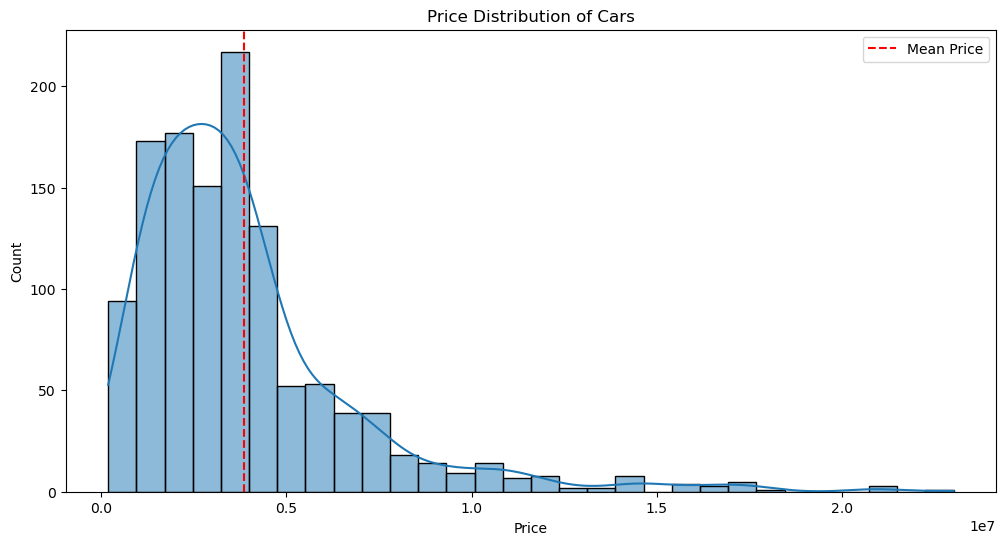

In [19]:
# price distribution of cars

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title("Price Distribution of Cars")
plt.xlabel("Price")
plt.ylabel('Count')
plt.axvline(df['price'].mean(),color = 'red', linestyle='--', label='Mean Price')
plt.legend()
plt.show()

In [20]:
# Box plot for variable price

fig = px.box(df,x="price",title="Price Boxplot")
fig.show()

In [21]:
# Numeric Variables vs Price scatter
numeric_cols = ["year", "mileage_km", "engine_cc"]

for col in numeric_cols:
    fig = px.scatter(
        df,
        x=col,
        y="price",
        title=f"{col} vs Price",
        opacity=0.5
    )
    fig.show()




In [22]:
# Correlation Heatmap

corr_df = df[["price" ,"year", "mileage_km", "engine_cc"]].corr()

px.imshow(
    corr_df,
    text_auto= True,
    title = "Correalation Heatmap"
)


In [23]:
# Categorical vs Price (Boxplots)


for col in ["fuel", "transmission", "body_type"]:
    fig = px.box(
        df,
        x = col,
        y= "price",
        title = f"{col}vs Price"
    )
    fig.show()


In [24]:
# Categorical Feature Distributions (Count)
categorical_cols = ["fuel", "transmission", "body_type"]

for col in categorical_cols:
    top_counts = df[col].value_counts().head(10).reset_index()
    top_counts.columns = [col, "count"]

    fig = px.bar(
        top_counts, 
        x=col,
        y="count",
        title = f"{col} Distribution (Top 10)"
    )
    fig.show()


In [25]:
# Categorical vs Price (Mean Price)
for col in ["fuel", "transmission", "body_type"]:
    mean_price = (
        df.groupby(col)["price"]
        .mean()
        .reset_index()
        .sort_values("price")
    )

    fig = px.bar(
        mean_price,
        x=col,
        y="price",
        title=f"Average Price by {col}"
    )
    fig.show()


## Model Building 

In [26]:
# One hot encode variable having less then 20 categories
df = pd.get_dummies(df, columns=["fuel","transmission","body_type"], drop_first=True)


In [27]:
# Label encoding of variables 

le = LabelEncoder()
for col in ["make","model","city","color"]:
    df[col] = le.fit_transform(df[col])


In [28]:
df.dtypes

city                         int64
color                        int64
engine_cc                  float64
make                         int64
mileage_km                   int64
model                        int64
price                        int64
year                         int64
fuel_Diesel                   bool
fuel_Hybrid                   bool
fuel_LPG                      bool
fuel_PHEV                     bool
fuel_Petrol                   bool
transmission_Manual           bool
body_type_Compact sedan       bool
body_type_Coupe               bool
body_type_Crossover           bool
body_type_Double Cabin        bool
body_type_Hatchback           bool
body_type_MPV                 bool
body_type_Micro Van           bool
body_type_Mini Van            bool
body_type_Mini Vehicles       bool
body_type_Pick Up             bool
body_type_SUV                 bool
body_type_Sedan               bool
body_type_Single Cabin        bool
body_type_Station Wagon       bool
body_type_Truck     

In [29]:
# Definition of input and target
X = df.drop("price", axis=1)
y = df["price"]


In [30]:
#  Data split for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
#  Normalization of features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [32]:
#  Linear Regression Training
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [33]:
# Ridge Regression Training
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)


In [44]:
# Random Forest Regressor Training

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

print(evaluate(y_test, y_pred_lr))
print(evaluate(y_test, y_pred_ridge))
print(evaluate(y_test, y_pred_rf))


{'MAE': 967077.7344905343, 'MSE': 2728722408218.682, 'RMSE': np.float64(1651884.5020819954), 'R2': 0.7312035585142513}
{'MAE': 967262.2782587789, 'MSE': 2730218454303.0024, 'RMSE': np.float64(1652337.2701428127), 'R2': 0.7310561884986891}
{'MAE': 306958.23309387756, 'MSE': 691519236975.9696, 'RMSE': np.float64(831576.3566720554), 'R2': 0.9318809749360242}


In [45]:
import pickle

with open("car_prediction_model.pkl","wb") as file:
    pickle.dump(rf, file)